In [8]:
import numpy as np
import math
rad = 6372795 #радиус сферы Земли
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from scipy import interpolate

In [9]:
 #Этап 1 задание а
data=np.genfromtxt('./SanFrancisco.csv',delimiter=",")
data

array([[  37.6080411, -122.396421 ,    1.       ],
       [  37.608951 , -122.396382 ,    3.       ],
       [  37.6087756, -122.396432 ,    3.       ],
       ...,
       [  37.801288 , -122.426125 ,   32.       ],
       [  37.8009016, -122.426264 ,   29.       ],
       [  37.8007906, -122.426383 ,   29.       ]])

In [10]:
#Этап 1 задание б
lats=[]
longs=[]
for i in range(data.shape[0]):
    lats.append(data[i][0]*math.pi/180)
    longs.append(data[i][1]*math.pi/180)

In [11]:
latssin=[]
latscos=[]
for i in range(data.shape[0]):  
    latssin.append(math.sin(lats[i]))
    latscos.append(math.cos(lats[i]))

In [12]:
delta=[]
for i in range(data.shape[0]-1):
    delta.append(longs[i+1]-longs[i])

In [13]:
cdelta=[]
sdelta=[]
for i in range(len(delta)):
    cdelta.append(math.cos(delta[i]))
    sdelta.append(math.sin(delta[i]))

In [14]:
y1=[]
x1=[]
for i in range(data.shape[0]-1):
    y1.append(math.sqrt(math.pow(latscos[i+1]*sdelta[i],2)+math.pow(latscos[i]*latssin[i+1]-latssin[i]*latscos[i+1]*cdelta[i],2)))
    x1.append(latssin[i]*latssin[i+1]+latscos[i]*latscos[i+1]*cdelta[i])

In [15]:
ad=[]
for i in range(data.shape[0]-1):
    ad.append(math.atan2(y1[i],x1[i]))

In [16]:
dist=[]
dist.append(0)
for i in range(data.shape[0]-1):
    dist.append(ad[i]*rad)

In [17]:
dataresult=np.array(dist)


In [18]:
np.c_[dataresult,data[:,2]]

array([[  0.        ,   1.        ],
       [101.26309494,   3.        ],
       [ 20.00035293,   3.        ],
       ...,
       [ 70.62385498,  32.        ],
       [ 44.68023482,  29.        ],
       [ 16.18032241,  29.        ]])

In [19]:
#Этап 1 задарие в
sumdist=[]
sumdist=np.cumsum(dataresult)

In [20]:
distresult=np.array(sumdist)

In [21]:
np.c_[distresult,data[:,2]]

array([[0.00000000e+00, 1.00000000e+00],
       [1.01263095e+02, 3.00000000e+00],
       [1.21263448e+02, 3.00000000e+00],
       ...,
       [4.97886554e+04, 3.20000000e+01],
       [4.98333357e+04, 2.90000000e+01],
       [4.98495160e+04, 2.90000000e+01]])

In [22]:
#Этап 1 задание г
altitude=[]
for i in range(data.shape[0]):
    altitude.append(data[i][2])

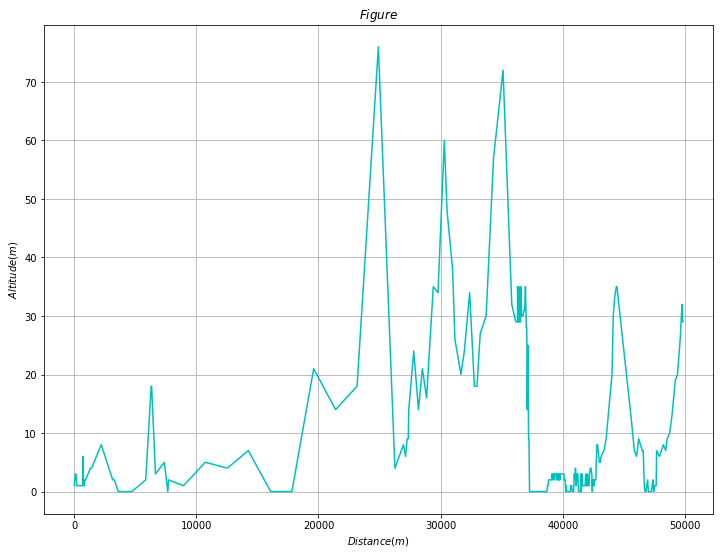

In [23]:
plt.figure(figsize=(12,9)) #размер
plt.plot(sumdist,altitude,'c');
plt.xlabel(r'$Distance(m)$') #Метка по оси x в формате TeX
plt.ylabel(r'$Altitude(m)$') #Метка по оси y в формате TeX
plt.title(r'$Figure$') #Заголовок в формате TeX
plt.grid(True) #Сетка

In [24]:
#Этап 1 задание д
h_x = interpolate.InterpolatedUnivariateSpline(sumdist,altitude)

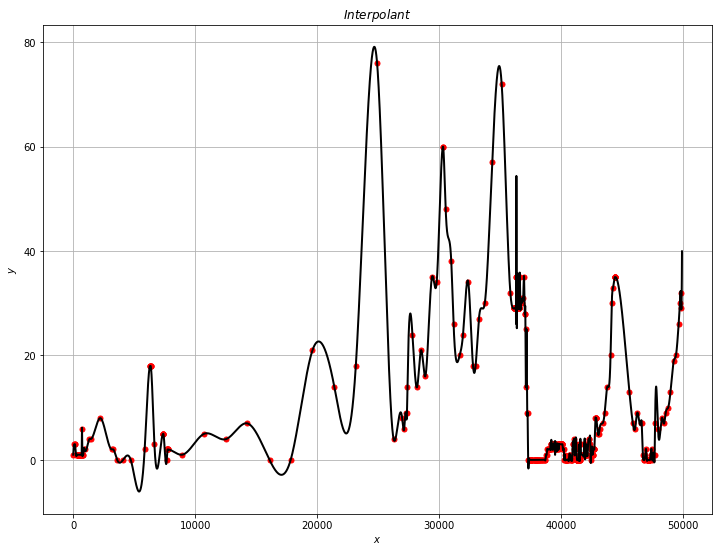

In [25]:
plt.figure(figsize=(12,9))
plt.plot(sumdist[:502], altitude[:502], 'ro', ms=5)
xs=np.linspace(0,49895,100000)
plt.plot(xs,h_x(xs), 'k',lw=2)
plt.title(r'$Interpolant$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

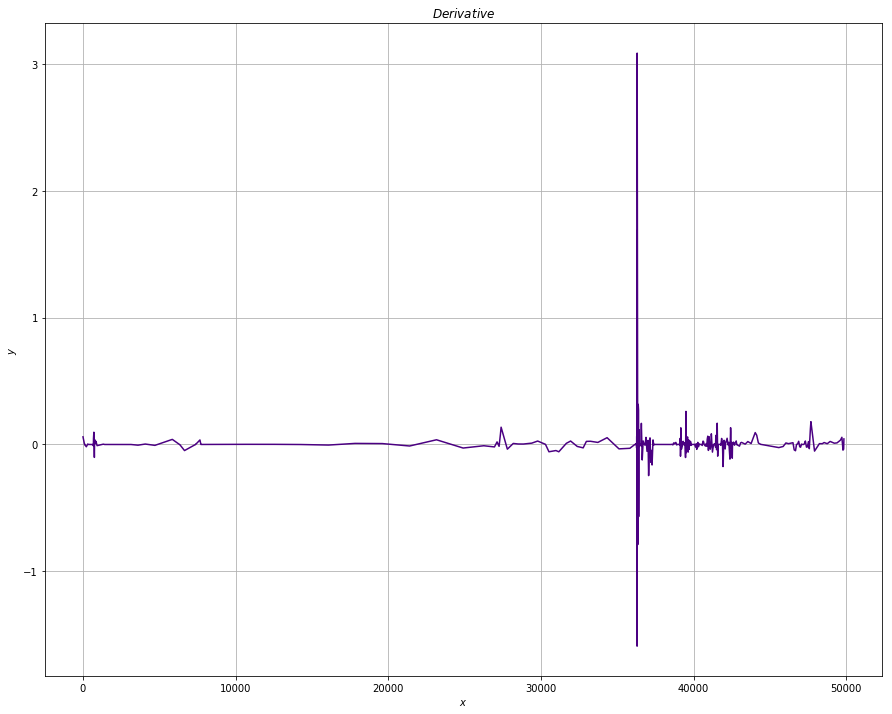

In [26]:
#Этап 2 задание а
alpha_x = h_x.derivative(n=1)
plt.figure(figsize=(15,12))
plt.plot(sumdist, alpha_x(sumdist), 'indigo')
plt.title(r'$Derivative$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

In [27]:
params=dict()
params={"m":1500,"g":9.82,"S":2.5,"Cx":0.25,
        "P":91940,"Kk":0.05,"Kt":0.8,"p":1.2466}

In [28]:
def motion_ode(t,s,alpha_x,params): 
    x,v=s
    
    sec_2=alpha_x(s[0])*alpha_x(s[0])+1
    
    sqrtsec=math.sqrt(sec_2)
    
    cos=1/sqrtsec
   
    dx=s[1]
    
    dv=(1/params["m"])*((params["P"]/s[1])*params["Kt"]-params["Cx"]*params["p"]*params["S"]*s[1]*s[1]/2-params["Kk"]*params["m"]*params["g"]*cos-params["m"]*params["g"]*alpha_x(s[0])*cos)
    
    return [dx,dv]

In [29]:
#начальные условия
v0=1e-16
x0=0
s0=[x0,v0]

In [30]:
def stopLength(t, s, L, lst):
    lst.append(np.hstack((s,t)))
    if (s[0] >= L):
        return -1
    return 0

In [31]:
    L=sumdist[502]
    prop = sp.integrate.ode(lambda t, s: motion_ode(t, s, alpha_x,params))
    prop.set_initial_value(s0, 0)
    prop.set_integrator('dopri5', nsteps=1e5)
    lst = []
    prop.set_solout(lambda t, s: stopLength(t, s, L, lst))
    prop.integrate(1e10)
    arr = np.asarray(lst)

In [32]:
arr.shape

(719, 3)

In [33]:
arr

array([[0.00000000e+00, 1.00000000e-16, 0.00000000e+00],
       [2.85250392e-50, 1.73079463e-16, 2.03937350e-34],
       [7.41127394e-49, 4.61738952e-16, 2.24331085e-33],
       ...,
       [4.97796725e+04, 4.30422373e+01, 1.08662877e+03],
       [4.98262109e+04, 4.38650899e+01, 1.08770067e+03],
       [4.98655731e+04, 4.36943955e+01, 1.08859644e+03]])

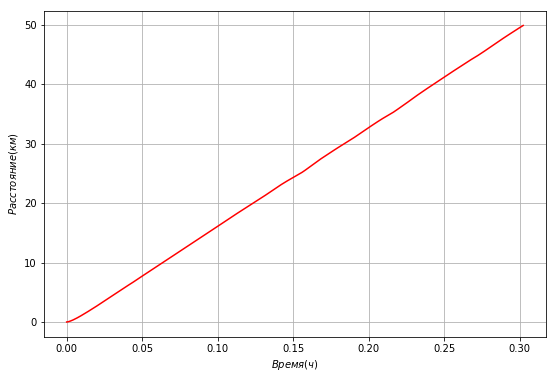

In [34]:
plt.figure(figsize=(9,6))
plt.plot(arr[:,2]/3600,arr[:,0]/1000, 'r')
plt.xlabel(r'$Время(ч)$')
plt.ylabel(r'$Расстояние(км)$')
plt.grid(True)
plt.show()
#Расстояние время

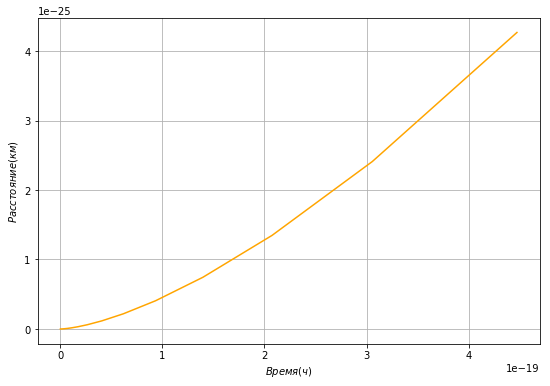

In [35]:
plt.figure(figsize=(9,6))
plt.plot(arr[:50,2]/3600,arr[:50,0]/1000, 'orange')
plt.xlabel(r'$Время(ч)$')
plt.ylabel(r'$Расстояние(км)$')
plt.grid(True)
plt.show()

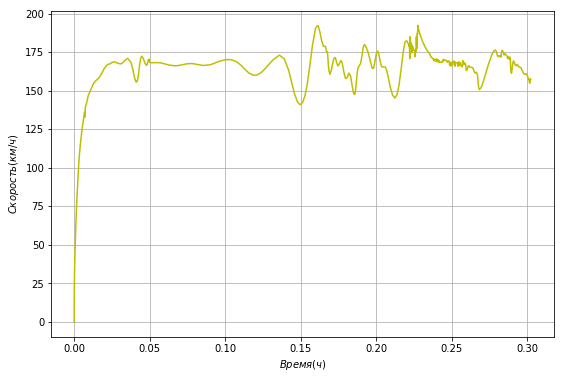

In [36]:
plt.figure(figsize=(9,6))
plt.plot(arr[:,2]/3600, arr[:,1]*3.6, 'y')
plt.xlabel(r'$Время(ч)$')
plt.ylabel(r'$Скорость(км/ч)$')
plt.grid(True)
plt.show()
#Время скорость

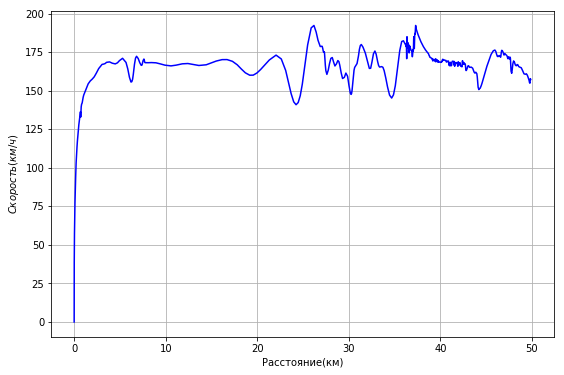

In [37]:
plt.figure(figsize=(9,6))
plt.plot(arr[:,0]/1000, arr[:,1]*3.6, 'b')
plt.xlabel(r'Расстояние(км)')
plt.ylabel(r'$Скорость(км/ч)$')
plt.grid(True)
plt.show()
#Расстояние скорость

In [42]:
arr.shape

(719, 3)

In [43]:
arr[718]

array([4.98655731e+04, 4.36943955e+01, 1.08859644e+03])

In [44]:
max(arr[:,1])#максимальная скорость в м/c

53.45058462004619

In [45]:
max(arr[:,0])

49865.57307017194

In [46]:
V=max(arr[:,1])
Vmax=V*3.6#максимальная скорость в км/ч
Vmax

192.4221046321663

In [47]:
max(arr[:,2])#общее время в секундах

1088.5964412417172

In [48]:
max(arr[:,2])/3600#общее время в часах


0.30238790034492147

In [49]:
L#общий путь в метрах

49849.516001435986

In [50]:
np.mean(arr[:,1])#среднее значение скорости в м/c

35.28732853295454

In [51]:
Vav=np.mean(arr[:,1])
Vср=Vav*3.6
Vср#Среднее значение скорости в км/ч

127.03438271863635

In [52]:
min(arr[:,1])#минимальная скорость

1e-16

In [42]:
arr1=[]
for i in range(arr.shape[0]):
    if ((arr[i][1]*3.6 <= 10) or (arr[i][1]*3.6>=100)):
        arr1.append(arr[i][1]*3.6)
    else:
        arr1.append(0)
#arr2=[]
#for i in range(1959):
       # if(arr[i][1]>=100/3.6):
         #  arr2.append(arr[i][1])

In [43]:
array1=np.array(arr1)

In [44]:
array1.shape

(719,)

In [45]:
array1[158]

0.0

In [46]:
array1[159]

0.0